<a href="https://colab.research.google.com/github/abialjutt/abialjutt/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [330]:
import pandas as pd
churn = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [331]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [332]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [333]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [334]:
churn.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<Axes: >

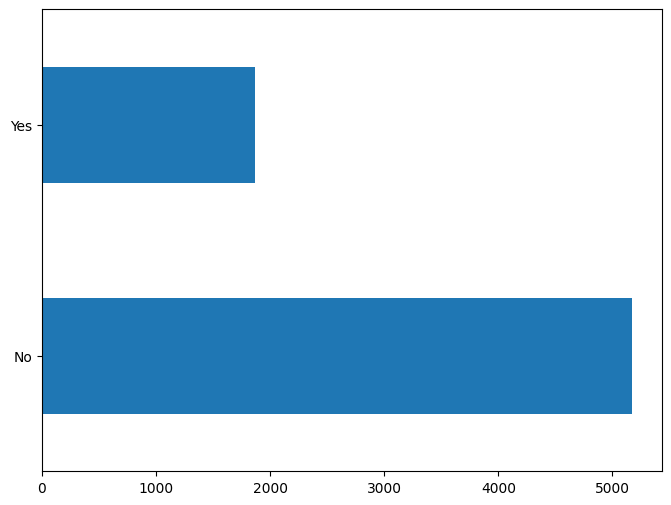

In [335]:
import matplotlib.pyplot as plt
churn['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))


In [336]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [337]:
100*churn['Churn'].value_counts()/len(churn['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalanced. Ratio 73:26

<Axes: >

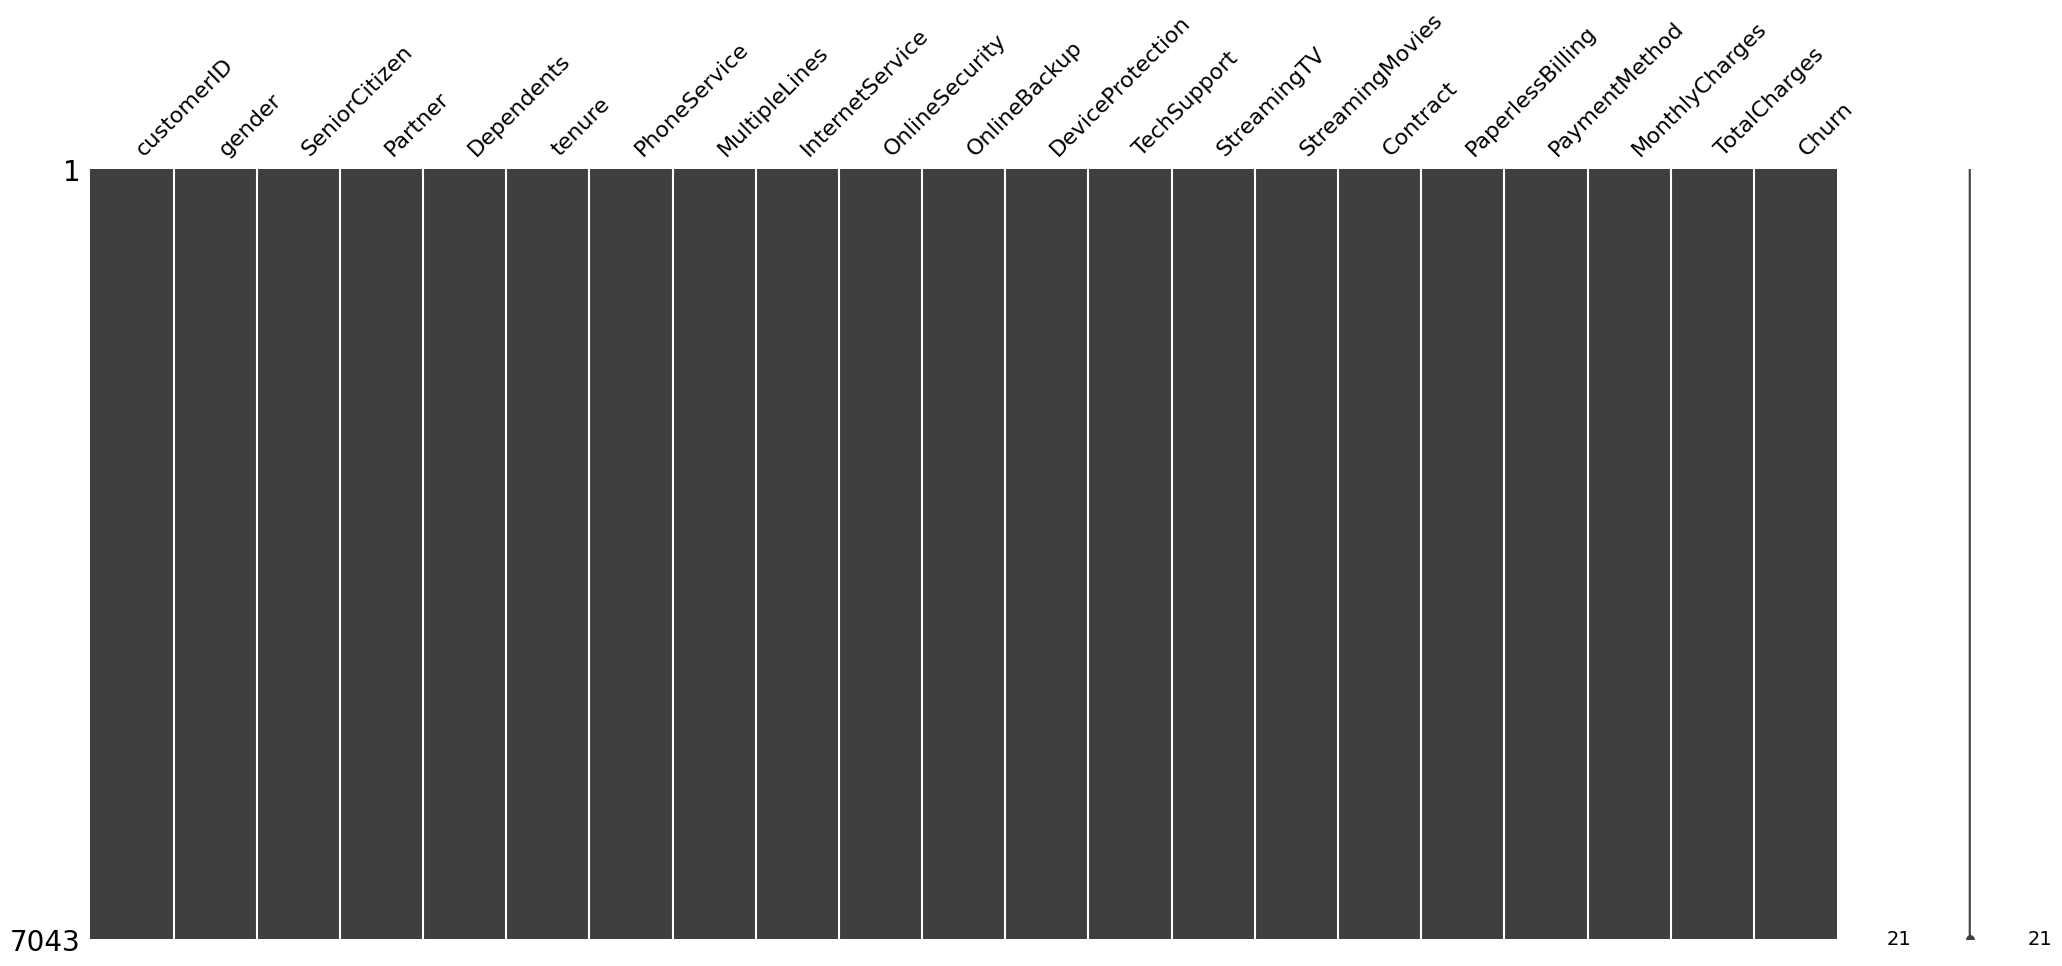

In [338]:
import missingno as msno
msno.matrix(churn)

In [339]:
churn = churn.drop('customerID', axis=1)

In [340]:
churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [341]:
churn.TotalCharges = pd.to_numeric(churn.TotalCharges, errors='coerce')
churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [342]:
churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [343]:
churn.fillna(churn['TotalCharges'].mean())
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: >

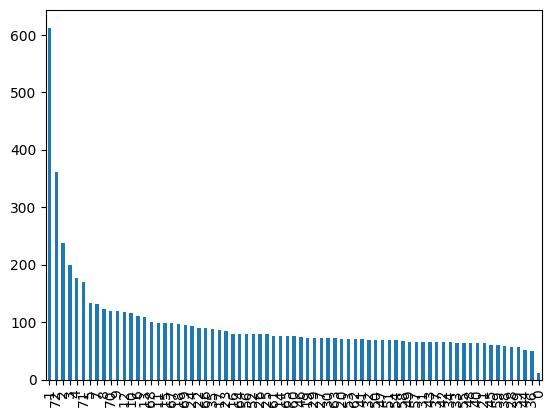

In [344]:
churn['tenure'].value_counts().plot(kind='bar')

In [345]:
zero_tenure_data = churn[churn['tenure'] == 0]
zero_tenure_data[['tenure', 'Churn']]

,tenure,Churn
488,0,No
753,0,No
936,0,No
1082,0,No
1340,0,No
3331,0,No
3826,0,No
4380,0,No
5218,0,No
6670,0,No


In [346]:
churn = churn.drop(zero_tenure_data.index)
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


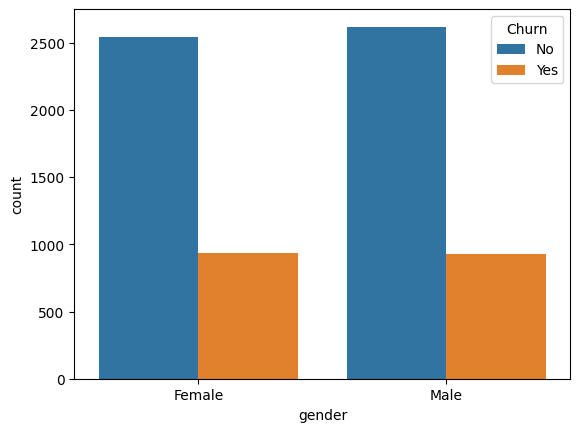

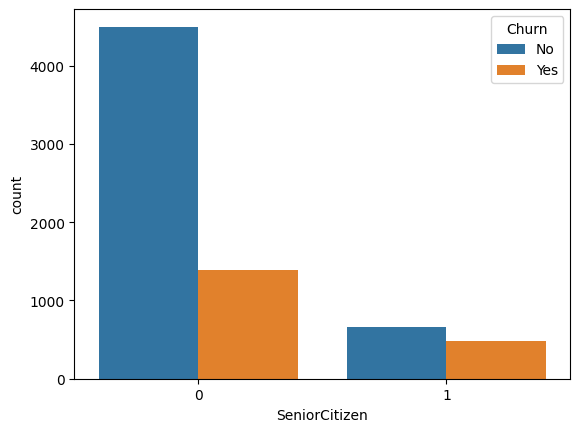

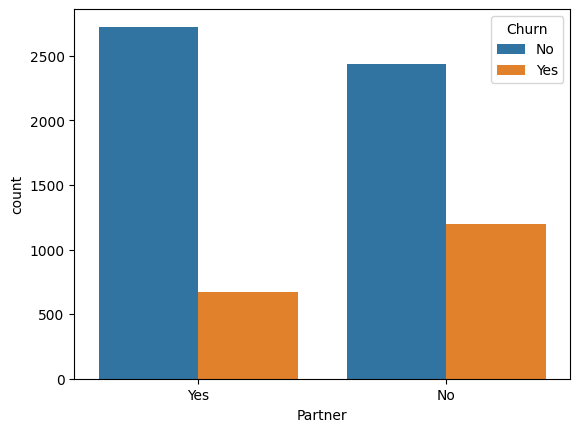

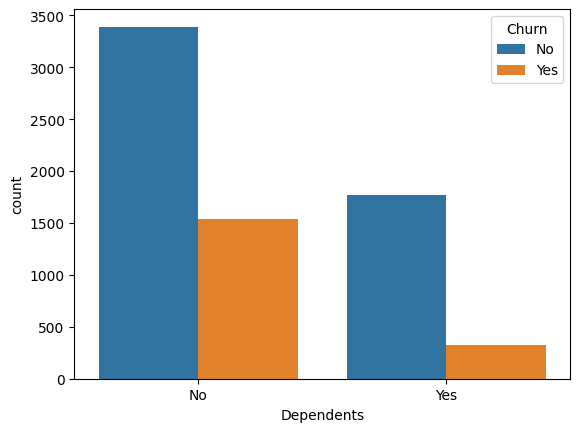

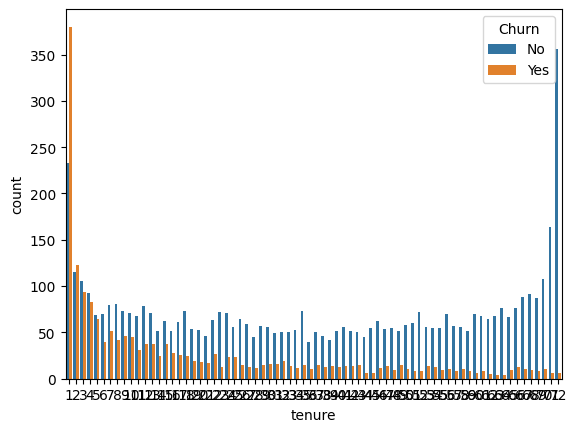

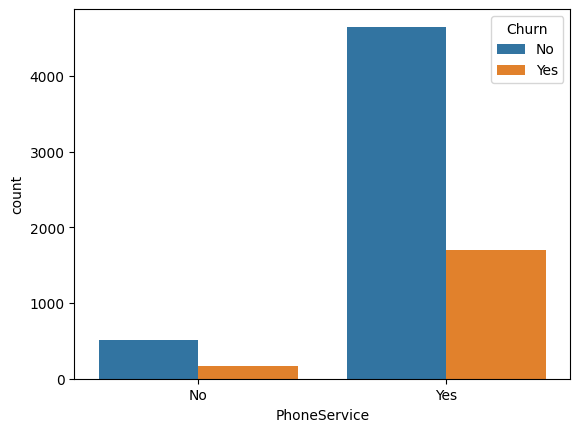

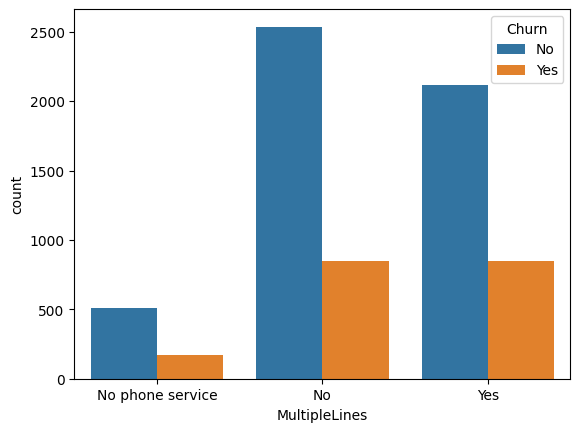

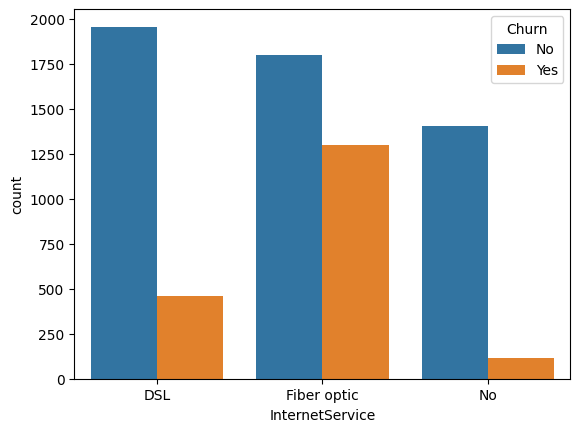

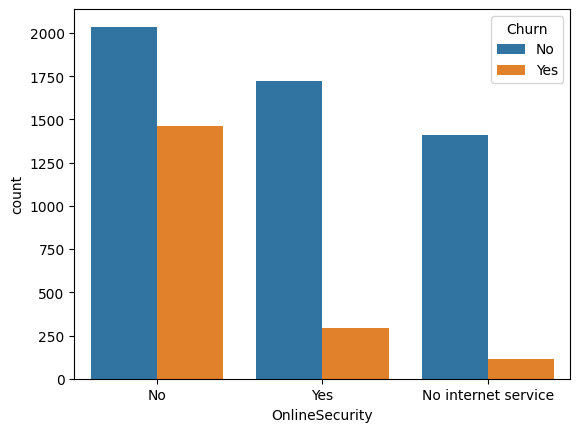

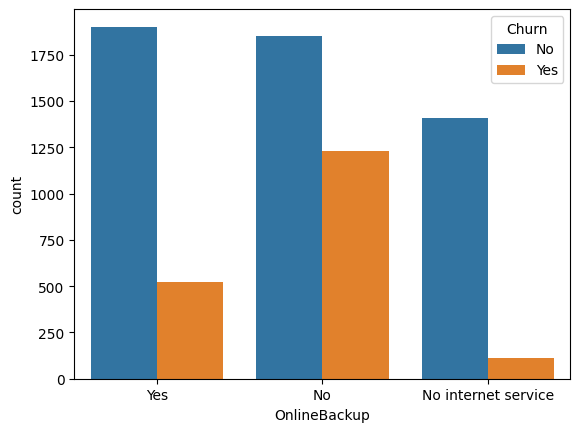

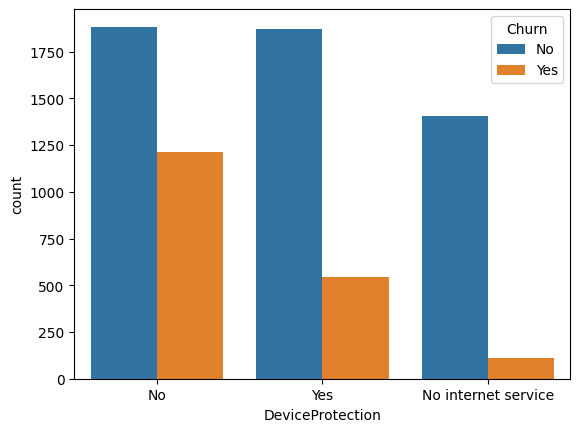

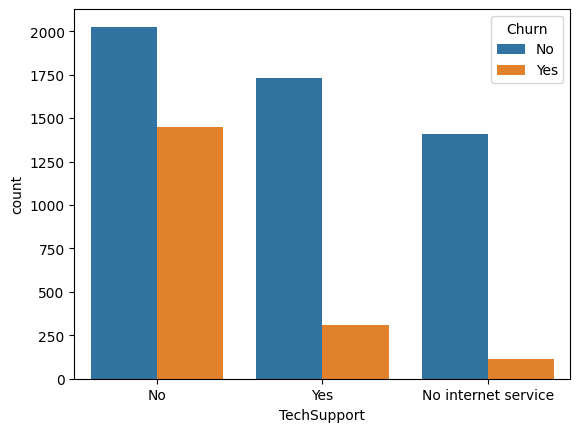

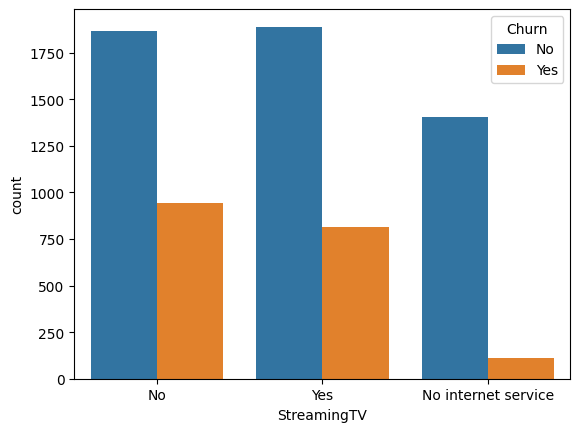

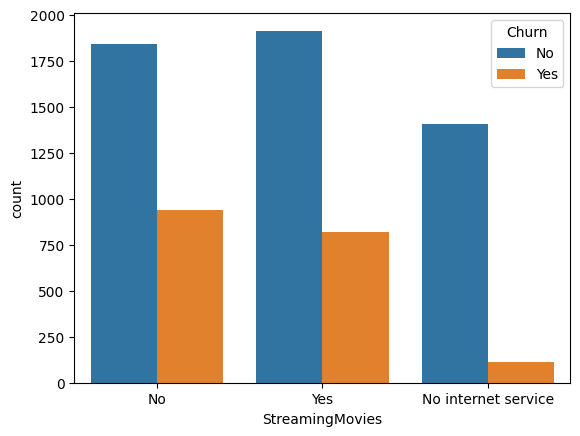

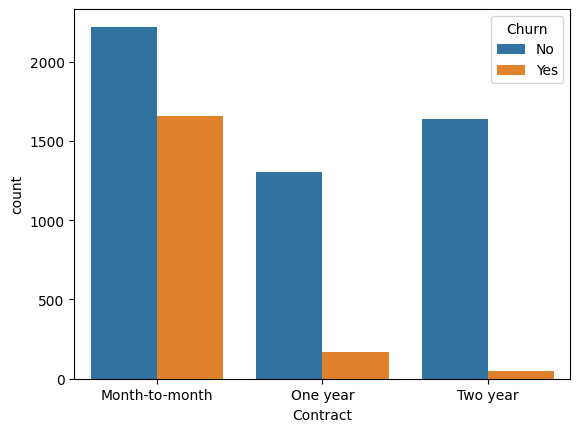

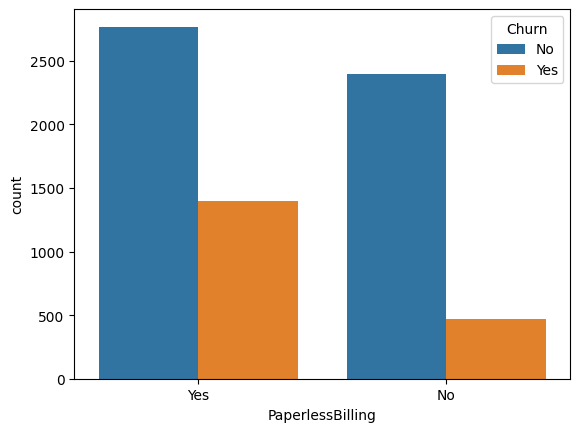

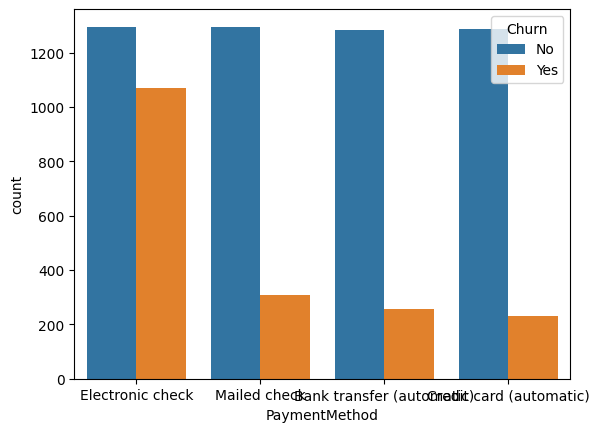

In [347]:
import seaborn as sns
for i, predictor in enumerate(churn.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=churn, x=predictor, hue='Churn')

In [348]:
from sklearn.preprocessing import LabelEncoder

string_columns = churn.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

churn[string_columns] = churn[string_columns].apply(label_encoder.fit_transform)
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


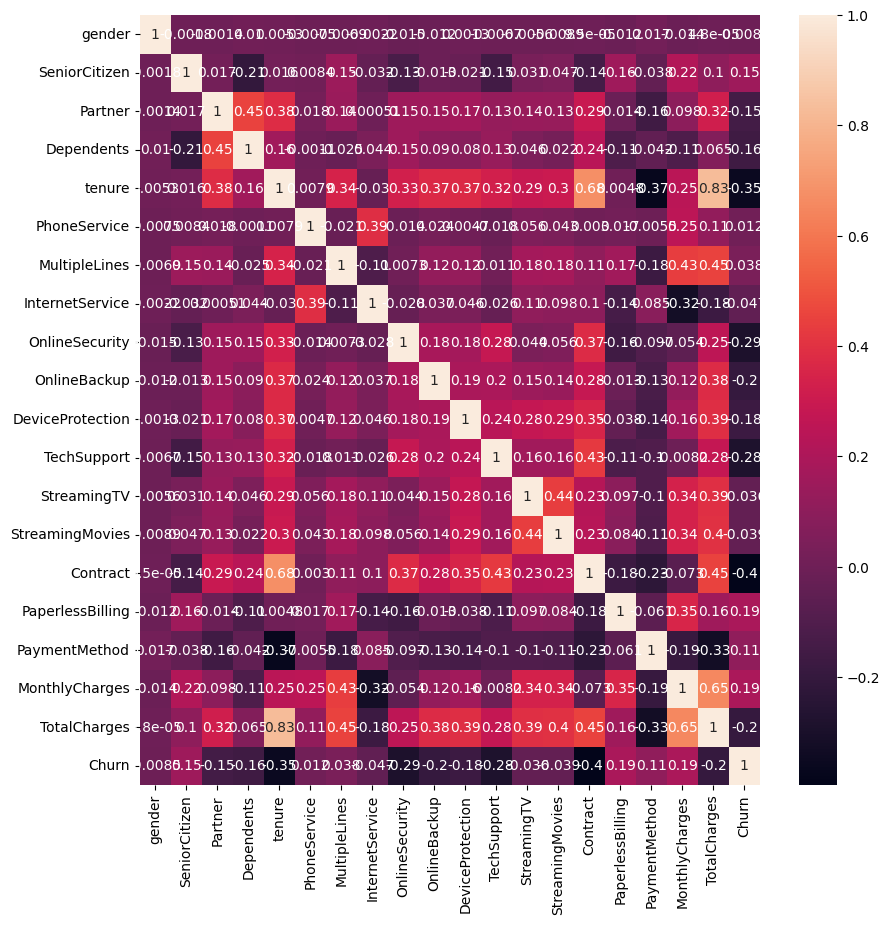

In [349]:
corr = churn.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [350]:
churn_rate_gender = churn.groupby('gender')['Churn'].mean()
churn_rate_gender

gender
0    0.269595
1    0.262046
Name: Churn, dtype: float64

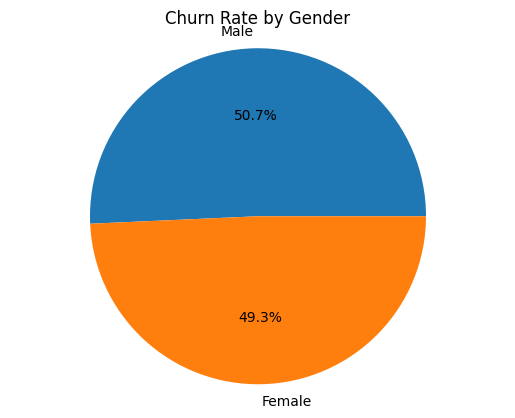

In [351]:
gender_labels = ['Male', 'Female']
churn_rate_gender = [0.269595, 0.262046]

# Plot
plt.pie(churn_rate_gender, labels=gender_labels, autopct='%1.1f%%')
plt.title('Churn Rate by Gender')
plt.axis('equal')
plt.show()

In [352]:
churn['SeniorCitizen'].corr(churn['Churn'])

0.15054105341568094

In [353]:
Senior_citizen_data = churn[churn['SeniorCitizen'] == 1]
Senior_citizen_data[['SeniorCitizen', 'Churn']]


,SeniorCitizen,Churn
20,1,1
30,1,0
31,1,0
34,1,0
50,1,0
...,...,...
7023,1,0
7029,1,0
7031,1,0
7032,1,1


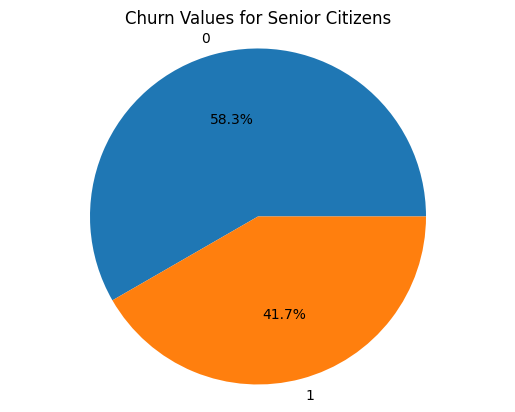

In [354]:
senior_citizen_churn_counts = Senior_citizen_data['Churn'].value_counts()
labels = senior_citizen_churn_counts.index
values = senior_citizen_churn_counts.values

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Churn Values for Senior Citizens")
plt.axis('equal')
plt.show()

Senior citizens are churner. Need to cater the issues of senior citizen. Not much resourses would be allocated to them. because of age factor

In [355]:
churn['SeniorCitizen'].corr(churn['tenure'])

0.015683479899134607

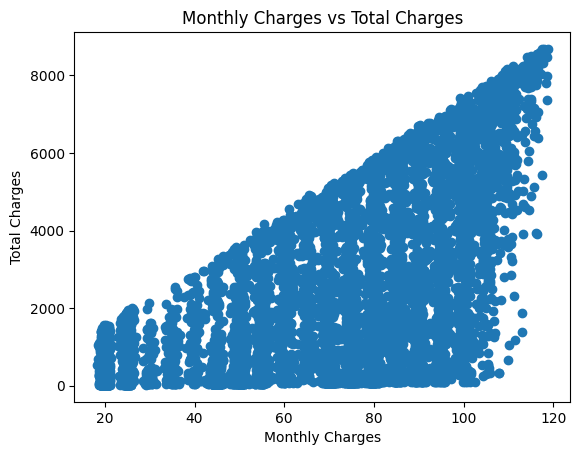

In [356]:
plt.scatter(churn["MonthlyCharges"], churn["TotalCharges"])
plt.title("Monthly Charges vs Total Charges")

plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")

plt.show()

Total charges increases as monthly charges increases

In [357]:
x=churn.drop('Churn',axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [358]:
y=churn['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [359]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [360]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

model_churn=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_churn.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [361]:
model_churn.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [362]:
y_pred=model_churn.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [363]:
model_churn.score(x_test,y_test)

0.806680881307747

In [364]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred, labels=[0,1])

'              precision    recall  f1-score   support\n\n           0       0.82      0.94      0.87      1005\n           1       0.75      0.49      0.59       402\n\n    accuracy                           0.81      1407\n   macro avg       0.78      0.71      0.73      1407\nweighted avg       0.80      0.81      0.79      1407\n'

In [365]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [366]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [367]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [368]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [369]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [370]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [371]:
model_score_r1

0.8199419167473379

In [372]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate a confusion matrix and calculate the metrics
cm = confusion_matrix(yr_test1, yr_predict1)
accuracy = accuracy_score(yr_test1, yr_predict1)
precision = precision_score(yr_test1, yr_predict1, average='weighted')
recall = recall_score(yr_test1, yr_predict1, average='weighted')
f1 = f1_score(yr_test1, yr_predict1, average='weighted')

# Print the confusion matrix and metrics
print("Confusion matrix:")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
# Print the accuracy of the model
print("Accuracy: {:.2f}%".format(accuracy*100))

Confusion matrix:
Predicted     0    1   All
True                      
0           940   65  1005
1           207  195   402
All        1147  260  1407
Accuracy: 0.8199419167473379
Precision: 0.8229825383815961
Recall: 0.8199419167473379
F1 Score: 0.8196824867727339
Accuracy: 81.99%


In [373]:
feature_importances = model_rf_smote.feature_importances_
feature_importances

array([0.01091623, 0.0008013 , 0.02568502, 0.05414419, 0.08765717,
       0.00140551, 0.00256092, 0.04600176, 0.16935256, 0.03935413,
       0.0184856 , 0.15229773, 0.00537375, 0.00484553, 0.24933125,
       0.00176617, 0.01591377, 0.06137607, 0.05273133])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'gender'),
  Text(1, 0, 'SeniorCitizen'),
  Text(2, 0, 'Partner'),
  Text(3, 0, 'Dependents'),
  Text(4, 0, 'tenure'),
  Text(5, 0, 'PhoneService'),
  Text(6, 0, 'MultipleLines'),
  Text(7, 0, 'InternetService'),
  Text(8, 0, 'OnlineSecurity'),
  Text(9, 0, 'OnlineBackup'),
  Text(10, 0, 'DeviceProtection'),
  Text(11, 0, 'TechSupport'),
  Text(12, 0, 'StreamingTV'),
  Text(13, 0, 'StreamingMovies'),
  Text(14, 0, 'Contract'),
  Text(15, 0, 'PaperlessBilling'),
  Text(16, 0, 'PaymentMethod'),
  Text(17, 0, 'MonthlyCharges'),
  Text(18, 0, 'TotalCharges')])

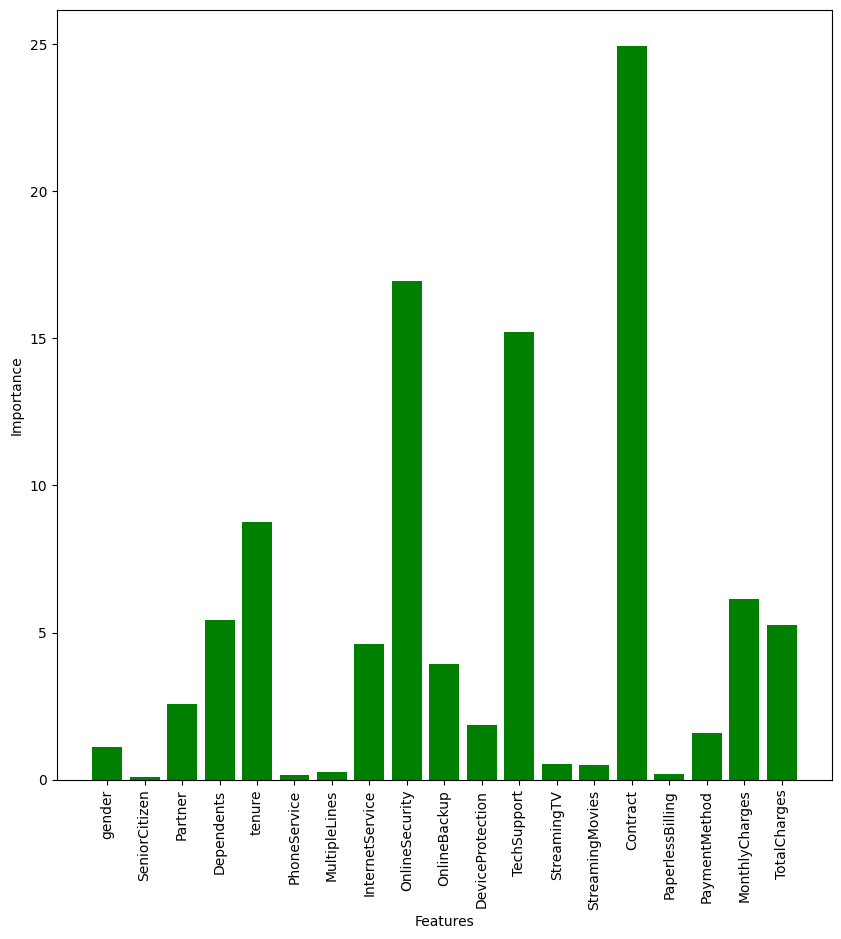

In [374]:
plt.figure(figsize=(10,10))
plt.bar(x_train.columns, feature_importances*100, color='green' )
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)